# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

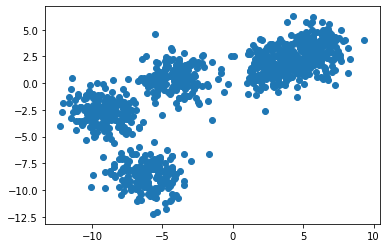

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [40]:
k = 5

np.random.seed(49)
rand_range = lambda i: np.random.uniform(np.min(X[:, i]), np.max(X[:, i]))
centroids = np.array([[rand_range(0), rand_range(1)] for _ in range(k)])
old_centroids = np.zeros(centroids.shape)
centroids

array([[-5.7505904 , -7.6587978 ],
       [ 7.75142924,  4.24748834],
       [ 2.50369528, -1.75087493],
       [-0.43931474, -8.33559269],
       [ 4.37078587,  4.33295431]])

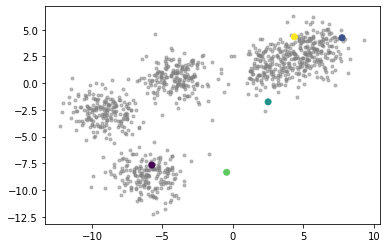

In [41]:
plt.scatter(X[:, 0], X[:, 1], color='grey', alpha=0.5, marker='.')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(k))
plt.show()

In [42]:
def cluster_selection(X, centroids):
    distance_to_centroids = np.zeros((X.shape[0], k))
    for i in range(k):    
        distance_to_centroids[:, i] = np.sqrt(
            (X[:, 0] - centroids[i, 0]) ** 2 + 
            (X[:, 1] - centroids[i, 1]) ** 2)
    # np.min(distance_to_centroids[:3, :], axis = 1) 
    return np.argmin(distance_to_centroids, axis = 1)

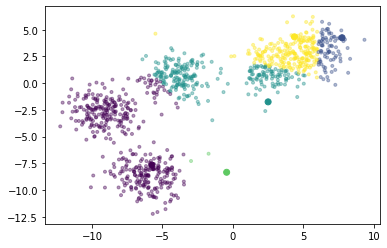

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_selection(X, centroids), alpha= 0.4, marker ='.')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(k), marker='o')

In [44]:
def update_centroids(X, Y, centroids):
    for i in range(k):
        centroids[i, 0] = np.mean(X[Y == i][:, 0])
        centroids[i, 1] = np.mean(X[Y == i][:, 1])
    return centroids

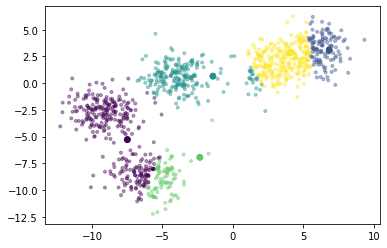

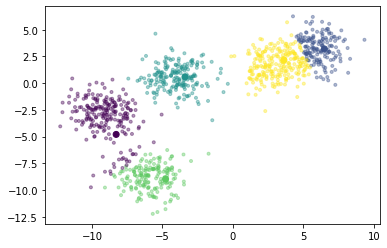

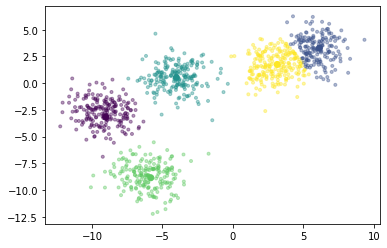

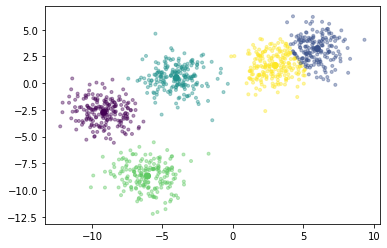

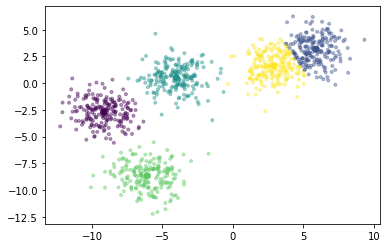

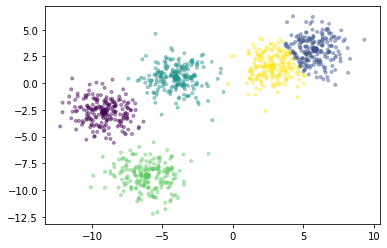

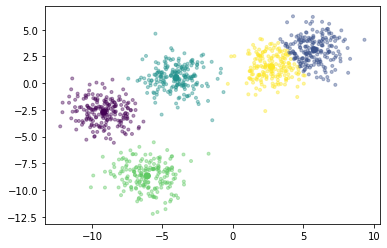

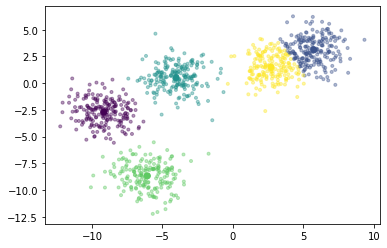

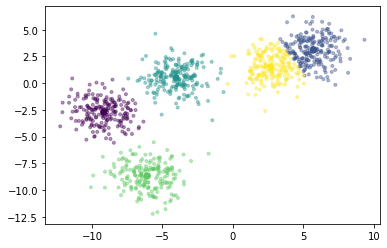

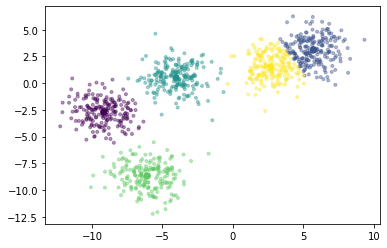

In [45]:
Y = cluster_selection(X, centroids)

while True:
    old_centroids = centroids.copy()
    centroids = update_centroids(X, Y, centroids)
    Y = cluster_selection(X, centroids) 
    plt.scatter(X[:, 0], X[:, 1], c=cluster_selection(X, centroids), alpha=0.4, marker='.')
    plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(k), marker='o')
#     ax = plt.axes()
#     for i in range(k):
#         old_x = old_centroids[i, 0]
#         old_y = old_centroids[i, 1]
#         dx = (centroids[i, 0] - old_centroids[i, 0])*0.75
#         dy = (centroids[i, 1] - old_centroids[i, 1])*0.75
#         ax.arrow(old_x, old_y, dx, dy, head_width=0.3, head_length=0.5)
    plt.pause(2)
    
    if np.array_equal(old_centroids, centroids):
        break

plt.show()

## Отдельный класс k means

In [46]:
class k_means:
    def __init__(self, X, k):
        self.X = X
        self.k = k
        self.Y = np.zeros(X.shape[0])
        
#         rand_range = lambda i: np.random.uniform(np.min(X[:, i]), np.max(X[:, i]))
#         self.centroids = np.array([[rand_range(0), rand_range(1)] for _ in range(k)])
        self.centroids = np.array([[np.random.choice(X[:, 0]), np.random.choice(X[:, 1])] for _ in range(k)])
    
    def cluster_selection(self):
        distance_to_centroids = np.zeros((self.X.shape[0], self.k))
        for i in range(self.k):    
            distance_to_centroids[:, i] = np.sqrt(
                (self.X[:, 0] - self.centroids[i, 0]) ** 2 + 
                (self.X[:, 1] - self.centroids[i, 1]) ** 2) 
        return np.argmin(distance_to_centroids, axis = 1)
    
    def update_centroids(self):
        for i in range(self.k):
            if self.X[self.Y == i].shape[0] == 0:
                continue
            self.centroids[i, 0] = np.mean(self.X[self.Y == i][:, 0])
            self.centroids[i, 1] = np.mean(self.X[self.Y == i][:, 1])
        return self.centroids
    
    def train(self):
        iteration = 0
        old_centroids = np.zeros(self.centroids.shape)
        self.Y = self.cluster_selection()
        while True:
            iteration += 1
            old_centroids = self.centroids.copy()
            self.update_centroids()
            self.Y = self.cluster_selection()
            if np.array_equal(old_centroids, self.centroids) or iteration >= 100:
                break
        return self.Y
    
    def SSE(self):
        SSE = 0
        for i in range(self.k):
            SE_cluster = np.sum((self.X[self.Y == i] - self.centroids[i]) ** 2)
            SSE += SE_cluster
        return SSE

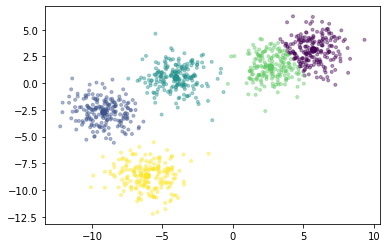

In [47]:
np.random.seed()
k_m = k_means(X, 5)
Y = k_m.train()
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.4, marker='.')
plt.scatter(k_m.centroids[:, 0], k_m.centroids[:, 1], c=np.arange(5), marker='o')

In [48]:
k_m = k_means(X, 8)
k_m.centroids

array([[ -8.976441  ,   3.18288055],
       [  4.73141542,   2.72709703],
       [ -7.10589603,   1.43245278],
       [  7.27455352,   0.37218923],
       [  2.29523503,  -2.47978138],
       [ -7.56766726,  -4.78433237],
       [  1.9897879 ,  -2.02064517],
       [ -7.77640501, -10.39664085]])

3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

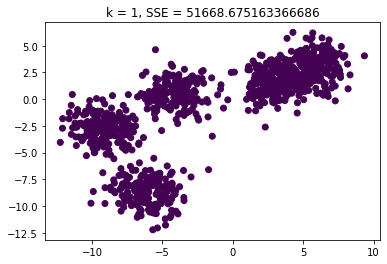

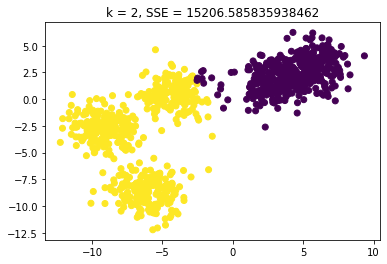

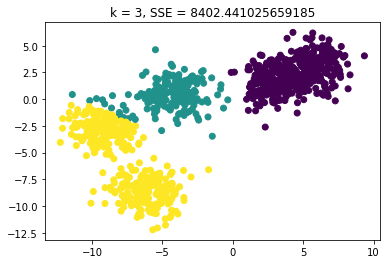

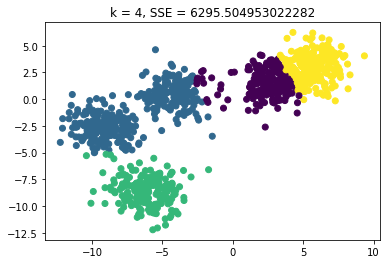

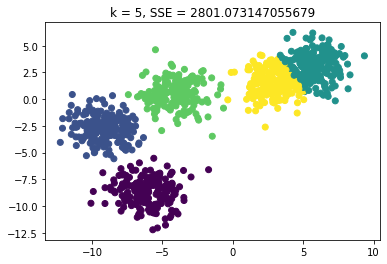

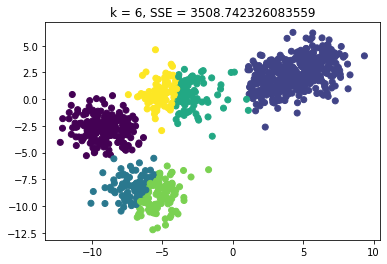

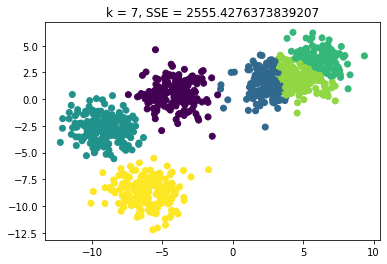

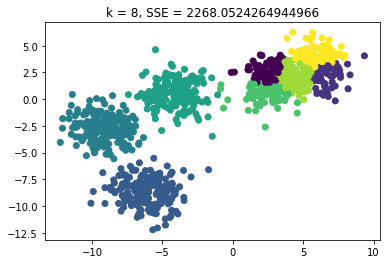

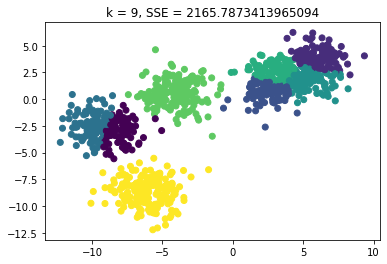

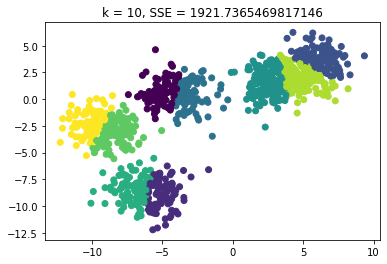

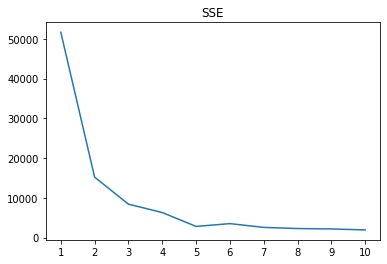

In [49]:
np.random.seed(3)
SSE_lst = []
for i in range(1, 11):
    k_m = k_means(X, i)
    Y = k_m.train()
    plt.scatter(X[:, 0], X[:, 1], c = Y)
    plt.title(f'k = {i}, SSE = {k_m.SSE()}')
    plt.show()
    SSE_lst.append(k_m.SSE())

plt.plot(np.arange(1, 11), SSE_lst)
plt.title('SSE')
plt.xticks(np.arange(1, 11))
plt.show()

## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [51]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [53]:
from sklearn.cluster import KMeans #, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(1,21,1):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)

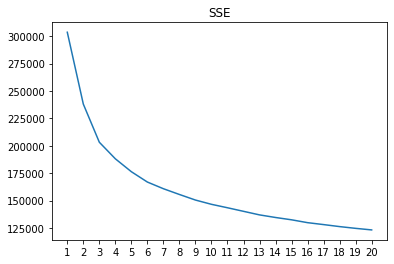

In [54]:
plt.plot(np.arange(1, 21), inertia)
plt.title('SSE')
plt.xticks(np.arange(1, 21))
plt.show()

In [58]:
k = 10 #????
method = KMeans(n_clusters=k)
method.fit(new_df)
method.labels_

array([8, 5, 4, ..., 5, 0, 1], dtype=int32)

In [56]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print('Год: ', round(claster['Год'].mean(), ndigits=1))
    print('Пробег: ', claster['Пробег'].mean())
    print('Объем: ', claster['Объем'].mean())
    print('Мощность: ', claster['Мощность'].mean())
    print('Цена: ', claster['Цена'].mean())
    print(claster['Привод'].value_counts().head(1))
    print(claster['Марка'].value_counts().head(2))
    print(claster['Кузов'].value_counts().head(2))
    print(claster['КПП'].value_counts().head(2))
    print('---------------------------\n')

In [59]:
for it in range(k):
    cls_info(df, it)

------ Кластер  0  -------
Год:  2009.0
Пробег:  104150.92881022615
Объем:  1537.9154375614553
Мощность:  100.45860373647984
Цена:  309198.75791543757
передний    4735
Name: Привод, dtype: int64
ВАЗ          1081
Chevrolet     454
Name: Марка, dtype: int64
седан      2188
хэтчбек    1965
Name: Кузов, dtype: int64
механика    4593
автомат      275
Name: КПП, dtype: int64
---------------------------

------ Кластер  1  -------
Год:  2006.2
Пробег:  156104.47632991703
Объем:  3431.966813079551
Мощность:  253.1088335773548
Цена:  856507.1317715959
полный    1694
Name: Привод, dtype: int64
BMW              343
Mercedes-Benz    256
Name: Марка, dtype: int64
кроссовер      913
внедорожник    528
Name: Кузов, dtype: int64
автомат     1902
вариатор      83
Name: КПП, dtype: int64
---------------------------

------ Кластер  2  -------
Год:  1998.5
Пробег:  245475.91965566715
Объем:  1884.7058823529412
Мощность:  124.11649928263988
Цена:  203863.29296987088
передний    2376
Name: Привод, dtype: 